In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

from dps import darkphoton, sample
from dps.fit import dcs, ics

### Double differential cross section

In [2]:
N = 1000

sup = dict()
inf = dict()
kT = dict()

Ms = [1.0, 2.0, 5.0, 8.0]
zs = [0.1, 0.2, 0.5, 0.8]

for M in Ms:
    
    dp = darkphoton.DarkPhoton(M)
    f = dcs.DCS(M)

    sup_ = dict()
    inf_ = dict()
    kT_ = dict()

    for z in zs:
        _, kT_[z] = sample.sample(dp, "cut", N, z=z, mesh="constant", set_coord=True, quiet=False)

        sup_[z] = f.sup(dp.z, dp.kT)
        inf_[z] = f.inf(dp.z, dp.kT)
        
    kT[M] = kT_
    sup[M] = sup_
    inf[M] = inf_

/home/jonas/venv/3/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<IPython.core.display.Javascript object>


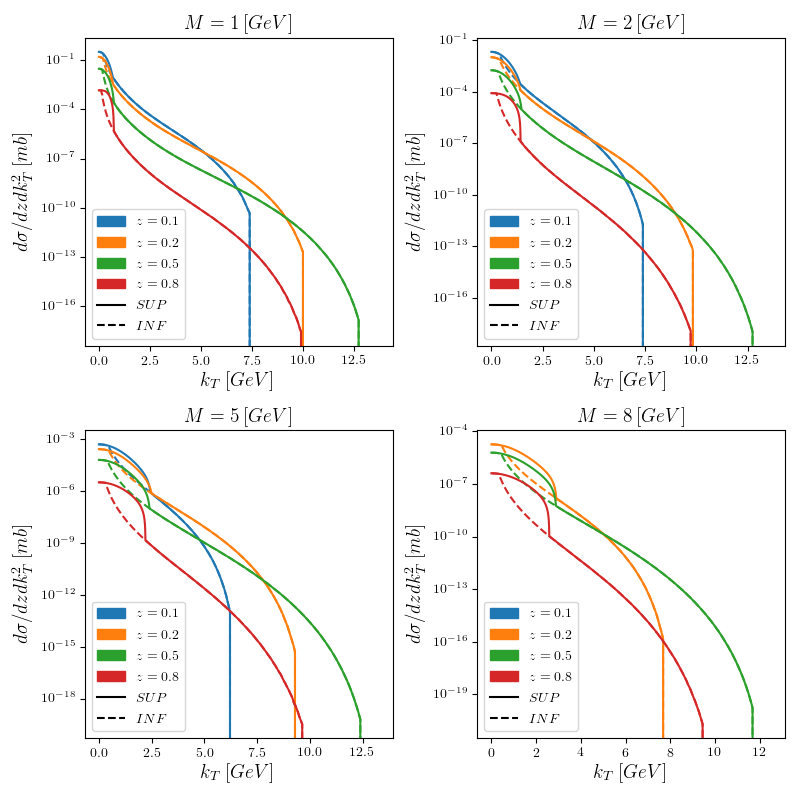

In [3]:
%matplotlib notebook

titles = [r"$M=1\:[GeV]$", r"$M=2\:[GeV]$", r"$M=5\:[GeV]$", r"$M=8\:[GeV]$"]

labels = [Patch(facecolor="C0", edgecolor="C0", label=r"$z=0.1$"),
          Patch(facecolor="C1", edgecolor="C1", label=r"$z=0.2$"),
          Patch(facecolor="C2", edgecolor="C2", label=r"$z=0.5$"),
          Patch(facecolor="C3", edgecolor="C3", label=r"$z=0.8$"),
          Line2D([0], [0], color='k', Linestyle='-', label=r"$SUP$"),
          Line2D([0], [0], color='k', Linestyle='--', label=r"$INF$")]


fig, ax = plt.subplots(2, 2, figsize=(8, 8))


for i, M in enumerate(Ms):
    
    i1 = i // 2
    i2 = i % 2
    
    for j, z in enumerate(zs):

        ax[i1, i2].plot(kT[M][z], sup[M][z], color="C{}".format(j), Linestyle='-')
        ax[i1, i2].plot(kT[M][z], inf[M][z], color="C{}".format(j), Linestyle='--')

    ax[i1, i2].set_xlabel(r"$k_T \: [GeV]$", fontsize=14)
    ax[i1, i2].set_ylabel(r"$d\sigma/dz dk_T^2 \: [mb]$", fontsize=14)
    ax[i1, i2].set(xscale='linear', yscale='log')
    ax[i1, i2].legend(handles=labels, loc="lower left")
    ax[i1, i2].set_title(titles[i], fontsize=14, fontweight="heavy")
    
plt.tight_layout()

### Transition momenta

In [ ]:
M = 2.0
dp = darkphoton.DarkPhoton(M, dirname="dcs/central/clean")
f = dcs.DCS(M)

In [7]:
N = 1000
z = 0.1
sample.sample(dp, "cut", N, z=z, mesh="constant", set_coord=True, quiet=True)

In [8]:
css = f.css(dp.z, dp.kT)
nlo = f.nlo(dp.z, dp.kT)
div = f.div(dp.z, dp.kT)

<IPython.core.display.Javascript object>


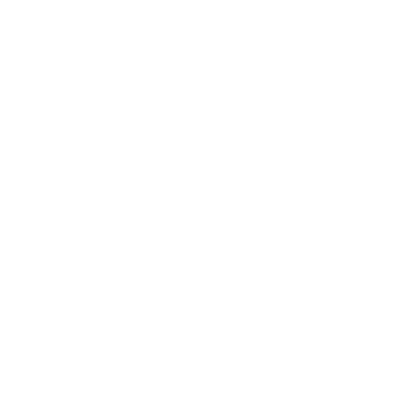

ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

In [12]:
%matplotlib notebook

labels = [Patch(facecolor="C0", edgecolor="C0", label=r"$d\sigma_{CSS}$"),
          Patch(facecolor="C1", edgecolor="C1", label=r"$d\sigma_{NLO}$"),
          Patch(facecolor="C2", edgecolor="C2", label=r"$d\sigma_{DIV}$"),
          Line2D([0], [0], color='k', Linestyle='-', label=r"pos"),
          Line2D([0], [0], color='k', Linestyle='--', label=r"neg")]

fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(dp.kT, css, color="C0", Linestyle='-')
ax.plot(dp.kT, nlo, color="C1", Linestyle='-')
ax.plot(dp.kT, div, color="C2", Linestyle='-')
ax.plot(dp.kT, - css, color="C0", Linestyle='--')
ax.plot(dp.kT, - nlo, color="C1", Linestyle='--')
ax.plot(dp.kT, - div, color="C2", Linestyle='--')

ax.axvline(0.46, ymin=0, ymax=0.8, Linestyle='--', color='gray', Linewidth=1.)
ax.axvline(1.794, ymin=0, ymax=0.8, Linestyle='--', color='gray', Linewidth=1.)

ax.set_xlabel(r"$k_T \: [GeV]$", fontsize=14)
ax.set_ylabel(r"$d\sigma/dz dk_T^2 \: [mb]$", fontsize=14)
ax.set(xscale='linear', yscale='log')
ax.set_ylim(bottom=1e-12)
ax.set_xlim(right=7.5)

plt.title(r"$M=2\:[GeV],\:z=0.1$")
plt.legend(handles=labels)
plt.tight_layout()
plt.text(0.2, 0.2, r"$k_{T1}$", fontsize=12)
plt.text(1.5, 0.2, r"$k_{T2}$", fontsize=12)

### Single differential cross section

In [7]:
from dps.generation import sdcs
from argparse import Namespace

In [8]:
def nlo(M, Nz=100, NkT=1000):
    
    dp = darkphoton.DarkPhoton(M)
    f = dcs.DCS(M)
    
    zs = np.linspace(dp.zmin, dp.zmax, Nz)
    data = {"sup": np.zeros(Nz), "inf": np.zeros(Nz)}
    
    allzs = list()
    allkTs = list()
    
    for i, z in enumerate(zs):
        
        sample.sample(dp, "cut", NkT, z=z, mesh="constant", set_coord=True, quiet=True)
        
        allzs = np.concatenate([allzs, dp.z])
        allkTs = np.concatenate([allkTs, dp.kT])
        
    inf = f.inf(allzs, allkTs)
    sup = f.sup(allzs, allkTs)
    for i in range(Nz):
        
        dkT = allkTs[i*NkT + 1] - allkTs[i*NkT]
        sinf = np.sum(inf[i*NkT:(i+1)*NkT] * allkTs[i*NkT:(i+1)*NkT]) * 2 * dkT
        ssup = np.sum(sup[i*NkT:(i+1)*NkT] * allkTs[i*NkT:(i+1)*NkT]) * 2 * dkT

        data["sup"][i] = ssup
        data["inf"][i] = sinf
        
    data["z"] = zs

    return data

def npm(M, Nz=100):
    
    args = Namespace()
    args.M = M
    args.N = Nz
    args.mesh = "constant"

    res = sdcs.central(args)
    
    return res

In [9]:
Ms = [1., 2., 5., 8.]
data = {"nlo": list(), "npm": list()}
for M in Ms:    
    data["nlo"].append(nlo(M))
    data["npm"].append(npm(M))

/home/jonas/venv/3/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


sdcs.py line 62 - INFO: 0 %
npm.py line 36 - WARNING: Interaction scale below the PDF lower bound for M=1.0.
sdcs.py line 62 - INFO: 1 %
npm.py line 36 - WARNING: Interaction scale below the PDF lower bound for M=1.0.
sdcs.py line 62 - INFO: 2 %
npm.py line 36 - WARNING: Interaction scale below the PDF lower bound for M=1.0.
sdcs.py line 62 - INFO: 3 %
npm.py line 36 - WARNING: Interaction scale below the PDF lower bound for M=1.0.
sdcs.py line 62 - INFO: 4 %
npm.py line 36 - WARNING: Interaction scale below the PDF lower bound for M=1.0.
sdcs.py line 62 - INFO: 5 %
npm.py line 36 - WARNING: Interaction scale below the PDF lower bound for M=1.0.
sdcs.py line 62 - INFO: 6 %
npm.py line 36 - WARNING: Interaction scale below the PDF lower bound for M=1.0.
sdcs.py line 62 - INFO: 7 %
npm.py line 36 - WARNING: Interaction scale below the PDF lower bound for M=1.0.
sdcs.py line 62 - INFO: 8 %
npm.py line 36 - WARNING: Interaction scale below the PDF lower bound for M=1.0.
sdcs.py line 62 - I

sdcs.py line 62 - INFO: 75 %
npm.py line 36 - WARNING: Interaction scale below the PDF lower bound for M=1.0.
sdcs.py line 62 - INFO: 76 %
npm.py line 36 - WARNING: Interaction scale below the PDF lower bound for M=1.0.
sdcs.py line 62 - INFO: 77 %
npm.py line 36 - WARNING: Interaction scale below the PDF lower bound for M=1.0.
sdcs.py line 62 - INFO: 78 %
npm.py line 36 - WARNING: Interaction scale below the PDF lower bound for M=1.0.
sdcs.py line 62 - INFO: 79 %
npm.py line 36 - WARNING: Interaction scale below the PDF lower bound for M=1.0.
sdcs.py line 62 - INFO: 80 %
npm.py line 36 - WARNING: Interaction scale below the PDF lower bound for M=1.0.
sdcs.py line 62 - INFO: 81 %
npm.py line 36 - WARNING: Interaction scale below the PDF lower bound for M=1.0.
sdcs.py line 62 - INFO: 82 %
npm.py line 36 - WARNING: Interaction scale below the PDF lower bound for M=1.0.
sdcs.py line 62 - INFO: 83 %
npm.py line 36 - WARNING: Interaction scale below the PDF lower bound for M=1.0.
sdcs.py li

sdcs.py line 62 - INFO: 89 %
sdcs.py line 62 - INFO: 90 %
sdcs.py line 62 - INFO: 91 %
sdcs.py line 62 - INFO: 92 %
sdcs.py line 62 - INFO: 93 %
sdcs.py line 62 - INFO: 94 %
sdcs.py line 62 - INFO: 95 %
sdcs.py line 62 - INFO: 96 %
sdcs.py line 62 - INFO: 97 %
sdcs.py line 62 - INFO: 98 %
sdcs.py line 62 - INFO: 99 %
sdcs.py line 62 - INFO: 0 %
sdcs.py line 62 - INFO: 1 %
sdcs.py line 62 - INFO: 2 %
sdcs.py line 62 - INFO: 3 %
sdcs.py line 62 - INFO: 4 %
sdcs.py line 62 - INFO: 5 %
sdcs.py line 62 - INFO: 6 %
sdcs.py line 62 - INFO: 7 %
sdcs.py line 62 - INFO: 8 %
sdcs.py line 62 - INFO: 9 %
sdcs.py line 62 - INFO: 10 %
sdcs.py line 62 - INFO: 11 %
sdcs.py line 62 - INFO: 12 %
sdcs.py line 62 - INFO: 13 %
sdcs.py line 62 - INFO: 14 %
sdcs.py line 62 - INFO: 15 %
sdcs.py line 62 - INFO: 16 %
sdcs.py line 62 - INFO: 17 %
sdcs.py line 62 - INFO: 18 %
sdcs.py line 62 - INFO: 19 %
sdcs.py line 62 - INFO: 20 %
sdcs.py line 62 - INFO: 21 %
sdcs.py line 62 - INFO: 22 %
sdcs.py line 62 - INFO: 

<IPython.core.display.Javascript object>


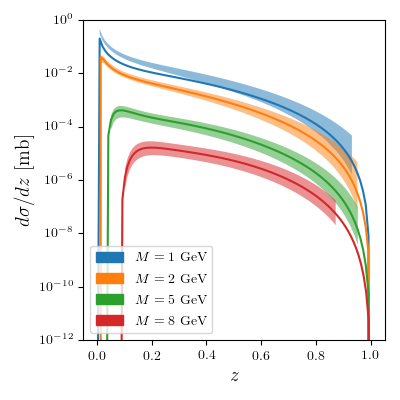

In [13]:
%matplotlib notebook

labels = [Patch(facecolor="C0", edgecolor="C0", label=r"$M=1$ GeV"),
          Patch(facecolor="C1", edgecolor="C1", label=r"$M=2$ GeV"),
          Patch(facecolor="C2", edgecolor="C2", label=r"$M=5$ GeV"),
          Patch(facecolor="C3", edgecolor="C3", label=r"$M=8$ GeV")]

fig, ax = plt.subplots(figsize=(4, 4))

for i, M in enumerate(Ms):

    ax.plot(data["npm"][i]["z"], data["npm"][i]["npm"], color="C{}".format(i), Linestyle='-')
    ax.fill_between(data["nlo"][i]["z"], data["nlo"][i]["inf"], data["nlo"][i]["sup"], color="C{}".format(i), alpha=0.5, Linewidth=0)
    
ax.set(xscale='linear',yscale='log')
ax.set_xlabel(r"$z$", fontsize=14)
ax.set_ylabel(r"$d\sigma/dz$ [mb]", fontsize=14)
ax.set_ylim(bottom=1e-12, top=1e0)

plt.legend(handles=labels, loc="lower left")
plt.tight_layout()

### Integrated cross section

In [2]:
# from dcs
masses_dcs = np.linspace(1, 12, 12)
cs = {"inf": list(), "sup": list()}

for M in masses_dcs:
    
    f = dcs.DCS(M)
    
    cs_inf, cs_sup = f.integrate()
    cs["inf"].append(cs_inf)
    cs["sup"].append(cs_sup)

/home/jonas/venv/3/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/jonas/Documents/DarkPhotonProduction/darkphoton-simulator/dps/utils.py:31: RuntimeWarning: invalid value encountered in true_divide
  onshell = xA * MT / M + kT**2 / _setup.S_beam / (1 -  xB * MT / M)
/home/jonas/Documents/DarkPhotonProduction/darkphoton-simulator/dps/utils.py:34: RuntimeWarning: invalid value encountered in less_equal
  cond2 = np.logical_and(M**2 / _setup.S_beam + eps <= onshell, onshell <= 1 - eps)
/home/jonas/Documents/DarkPhotonProduction/darkphoton-simulator/dps/darkphoton.py:189: RuntimeWarning: invalid value encountered in arccosh
  y = np.arccosh(0.5 * np.sqrt(_setup.S_beam) / MT * (1 + self.M**2 / _setup.S_beam))
/home/jonas/Documents/DarkPhotonProduction/darkphoton-simulator/dps/darkphoton.py:190: RuntimeWarning: inval

In [4]:
# from ics
i = ics.ICS()

masses_ics = np.linspace(1, 12, 1000)

npm = dict()
nlo = dict()

for key in ["central", "pdf", "scale"]:
    npm[key] = i.npm(key, masses_ics)
    nlo[key] = i.nlo(key, masses_ics)

<IPython.core.display.Javascript object>


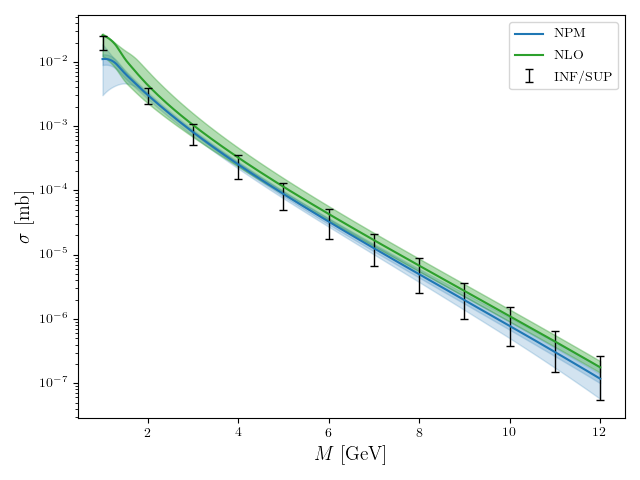

In [5]:
%matplotlib notebook

inf = np.array(cs["inf"])
sup = np.array(cs["sup"])

fig, ax = plt.subplots()

ax.plot(masses_ics, npm["central"], color="C0", Linestyle='-', label=r"NPM")
ax.fill_between(masses_ics, *npm["pdf"], color="C0", alpha=0.2)
ax.fill_between(masses_ics, *npm["scale"], color="C0", alpha=0.2)

ax.plot(masses_ics, nlo["central"], color="C2", Linestyle='-', label=r"NLO")
ax.fill_between(masses_ics, *nlo["scale"], color="C2", alpha=0.2)
ax.fill_between(masses_ics, *nlo["scale"], color="C2", alpha=0.2)

y = (inf + sup) / 2
dy = (sup - inf) / 2

ax.errorbar(masses_dcs, y, yerr=dy, color='k', Linestyle='None', elinewidth=1, capsize=3, label=r"INF/SUP")

ax.set_xlabel(r"$M$ [GeV]", fontsize=14)
ax.set_ylabel(r"$\sigma$ [mb]", fontsize=14)

ax.set(xscale='linear', yscale='log')

plt.legend()
plt.tight_layout()
plt.show()

### Physical domain

In [15]:
f = dcs.DCS(2.3, dirname="dcs/central_log")

sort.py line 229 - WARNING: 49370.pkl not clean. It may lead to bad fit. Use *sort.clean_data*.
sort.py line 229 - WARNING: 56982.pkl not clean. It may lead to bad fit. Use *sort.clean_data*.
sort.py line 229 - WARNING: 63584.pkl not clean. It may lead to bad fit. Use *sort.clean_data*.
sort.py line 229 - WARNING: 02424.pkl not clean. It may lead to bad fit. Use *sort.clean_data*.
sort.py line 229 - WARNING: 07177.pkl not clean. It may lead to bad fit. Use *sort.clean_data*.
sort.py line 229 - WARNING: 93981.pkl not clean. It may lead to bad fit. Use *sort.clean_data*.
sort.py line 229 - WARNING: 57650.pkl not clean. It may lead to bad fit. Use *sort.clean_data*.
sort.py line 229 - WARNING: 73008.pkl not clean. It may lead to bad fit. Use *sort.clean_data*.
sort.py line 229 - WARNING: 65461.pkl not clean. It may lead to bad fit. Use *sort.clean_data*.
sort.py line 229 - WARNING: 87729.pkl not clean. It may lead to bad fit. Use *sort.clean_data*.
sort.py line 229 - WARNING: 36908.pkl no

/home/jonas/venv/3/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [16]:
z = np.linspace(0, 1, 1000)
kTmax = f.kTmax(z)
kT1 = f.kT1(z)
kT2 = f.kT2(z)

<IPython.core.display.Javascript object>


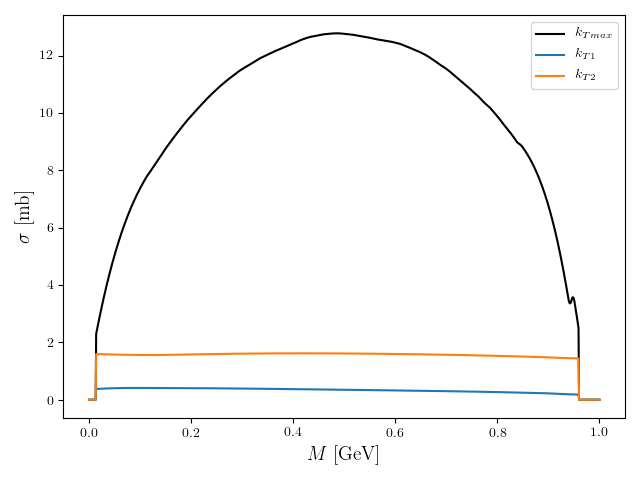

In [17]:
%matplotlib notebook

fig, ax = plt.subplots()

ax.plot(z, kTmax, color="black", Linestyle='-', label=r"$k_{Tmax}$")
ax.plot(z, kT1, color="C0", Linestyle='-', label=r"$k_{T1}$")
ax.plot(z, kT2, color="C1", Linestyle='-', label=r"$k_{T2}$")

ax.set_xlabel(r"$M$ [GeV]", fontsize=14)
ax.set_ylabel(r"$\sigma$ [mb]", fontsize=14)

ax.set(xscale='linear', yscale='linear')

plt.legend()
plt.tight_layout()
plt.show()